In [45]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

file_path = 'data/fy24-capital-budget-plan-recommended.csv'
df = pd.read_csv(file_path)


unique_departments = df['Department'].unique()
num_departments = len(unique_departments)

unique_project = df['Project_Name'].unique()
num_programs = len(unique_project)

scope_of_work = df['Scope_Of_Work'].unique()
num_expense_category = len(scope_of_work)

neighborhood = df['Neighborhood'].unique()
num_neighborhood = len(neighborhood
                       )
print("Number of departments:", num_departments)
print("Number of programs:", num_programs)
print("Number of expense category:", num_expense_category)

Number of departments: 17
Number of programs: 433
Number of expense category: 413


In [54]:
# Clean and convert the 'Total_Project_Budget' column to numeric values
df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'].str.replace('[^\d.]', ''), errors='coerce')

# Drop rows with missing or non-numeric budget values
df = df.dropna(subset=['Total_Project_Budget'])


In [55]:
df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'], errors='coerce')

# Total Budget for Department
total_budget_department = df.groupby('Department').agg({
    'Total_Project_Budget': 'sum',
})
total_budget_project = df.groupby('Project_Name').agg({
    'Total_Project_Budget': 'sum',
})
total_budget_scope = df.groupby('Scope_Of_Work').agg({
    'Total_Project_Budget': 'sum',
})
total_budget_neighborhood = df.groupby('Neighborhood').agg({
    'Total_Project_Budget': 'sum',
})

In [56]:
# Find the department with the highest funding received department 
department_with_highest_expenses = total_budget_department['Total_Project_Budget'].idxmax()
highest_expenses = total_budget_department['Total_Project_Budget'].max()

# Print the results
print("Department with the highest total expenses:", department_with_highest_expenses)
print("Total expenses for the department:", highest_expenses)


Department with the highest total expenses: Public Works Department
Total expenses for the department: 943321278.0


In [57]:
department_with_lowest_expenses = total_budget_department['Total_Project_Budget'].idxmin()
lowest_expenses = total_budget_department['Total_Project_Budget'].min()

print("Department with the lowest total expenses:", department_with_highest_expenses)
print("Total expenses for the department:", highest_expenses)

Department with the lowest total expenses: Public Works Department
Total expenses for the department: 943321278.0


Top 10 programs with the highest expenses:
                                       Total_Project_Budget  Percentage
Department                                                             
Public Works Department                         943321278.0   23.457408
Boston Public Schools                           885512651.0   22.019891
Property Management Department                  342620000.0    8.519873
Parks and Recreation Department                 331889348.0    8.253035
Transportation Department                       294968774.0    7.334938
Mayor's Office of Housing                       208000000.0    5.172300
Boston Centers for Youth and Families           203475000.0    5.059778
Environment Department                          172032167.0    4.277894
Boston Public Library                           154290000.0    3.836703
Fire Department                                 152147500.0    3.783426


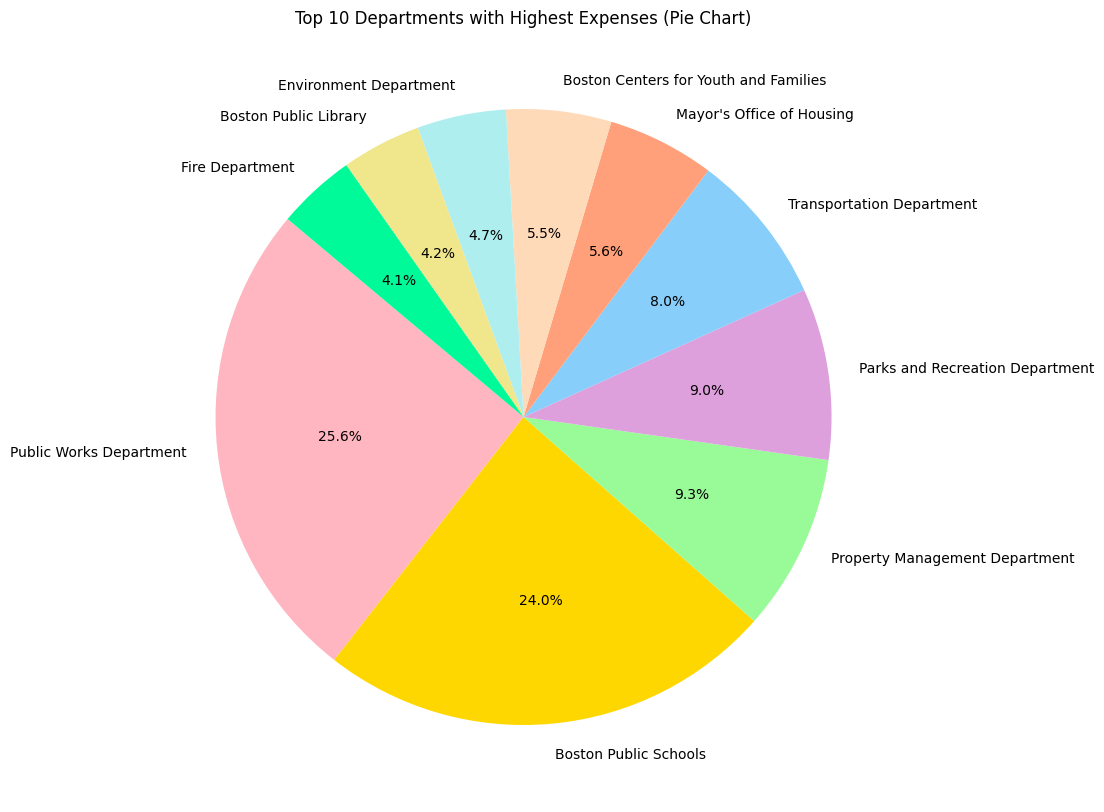

In [102]:
total_expenses = total_budget_department['Total_Project_Budget'].sum()
total_budget_department['Percentage'] = (total_budget_department['Total_Project_Budget'] / total_expenses) * 100

# Sort the programs by Actual Expense in descending order
sorted_departments = total_budget_department.sort_values(by='Total_Project_Budget', ascending=False)

# Select the top 10 programs with the highest expenses
top_10_departments = sorted_departments.head(10)

print("Top 10 programs with the highest expenses:")
print(top_10_departments)

# Create a custom list of pastel colors
pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#DDA0DD', '#87CEFA', '#FFA07A', '#FFDAB9', '#AFEEEE', '#F0E68C', '#00FA9A']

# Create a pie chart with pastel colors
plt.figure(figsize=(10, 10))
plt.pie(top_10_departments['Percentage'], labels=top_10_departments.index, autopct='%1.1f%%', colors=pastel_colors, startangle=140)
plt.title('Top 10 Departments with Highest Expenses (Pie Chart)')
plt.show()

In [59]:
# Calculate total expenses for each department
department_totals = total_budget_department.groupby('Department')['Total_Project_Budget'].sum()

# Sort the departments by total expense in descending order
sorted_departments = department_totals.sort_values(ascending=False)

# Print the total expense for each department
for department, total_expense in sorted_departments.items():
    print(f"Department: {department}")
    print(f"Total Expense: {total_expense}")
    print("=" * 20)

Department: Public Works Department
Total Expense: 943321278.0
Department: Boston Public Schools
Total Expense: 885512651.0
Department: Property Management Department
Total Expense: 342620000.0
Department: Parks and Recreation Department
Total Expense: 331889348.0
Department: Transportation Department
Total Expense: 294968774.0
Department: Mayor's Office of Housing
Total Expense: 208000000.0
Department: Boston Centers for Youth and Families
Total Expense: 203475000.0
Department: Environment Department
Total Expense: 172032167.0
Department: Boston Public Library
Total Expense: 154290000.0
Department: Fire Department
Total Expense: 152147500.0
Department: Public Health Commission
Total Expense: 110257000.0
Department: Department of Innovation and Technology
Total Expense: 83686892.0
Department: Police Department
Total Expense: 81421000.0
Department: Boston Planning and Development Agency
Total Expense: 35125000.0
Department: Office of Arts & Culture
Total Expense: 20975000.0
Department: 

### Projects by Public Works Department

In [60]:
# Find the department with the highest funding received
department_with_highest_expenses = total_budget_department['Total_Project_Budget'].idxmax()

# Select the project names for the department with the highest expenses
projects_for_highest_department = df[df['Department'] == department_with_highest_expenses]['Project_Name']

# Display the project names for the department with the highest expenses
print(f"Projects for the department with the highest expenses ({department_with_highest_expenses}):")
print(projects_for_highest_department)


Projects for the department with the highest expenses (Public Works Department):
141                             ADA/AAB Pedestrian Ramps
142                               Amory Street Extension
143                            Boylston Street Sidewalks
144                                       Bridge Repairs
145                              Cambridge Street Bridge
146                    Commonwealth Avenue Phase 3 and 4
147                         Commonwealth Avenue Phase 3B
148                   Congress Street and Sleeper Street
149                                      Cummins Highway
150                                 Dalton Street Bridge
151                           District Yard Improvements
152                                    Downtown Crossing
153                          East Eagle Street Shoreline
154                                     Emerald Necklace
155                               Footpath and Stairways
156                                        Friend Street
157    

In [61]:
scope_of_work_highest_funded_department = df[df['Department'] == department_with_highest_expenses]['Scope_Of_Work']

print(f"Projects for the department with the highest expenses ({department_with_highest_expenses}):")
print(scope_of_work_highest_funded_department)

Projects for the department with the highest expenses (Public Works Department):
141    Install or reconstruct pedestrian ramps to con...
142    Reconstruct road, sidewalks, and lighting from...
143    Design and construct sidewalk and/or streetsca...
144    Ongoing repairs at various City-owned bridges ...
145    Rehabilitate bridge, performing repairs as nee...
146    Design and reconstruct Commonwealth Avenue fro...
147    Construction of pedestrian and bicyclist safet...
148    Reconstruct Congress Street from Fort Point Ch...
149    Reconstruct road, make traffic improvements, i...
150    Design and construction to support the rehabil...
151    Facility assessment and improvements to the Ci...
152    Design improvements to the Washington Street/S...
153    Shoreline stabilization along Chelsea Creek ne...
154    Develop a master plan to create an active, gre...
155    Conduct assessment of footpaths and stairways ...
156    Reconstruct street and sidewalk on Friend Stre...
157    

Top 20 projects with the highest total project budget:
                                       Project_Name  Total_Project_Budget  \
42                       Josiah Quincy Upper School           223591467.0   
161                  North Washington Street Bridge           222521987.0   
171             Sullivan Square / Rutherford Avenue           170615403.0   
132                                 26 Court Street           165000000.0   
64                       Renew Boston Trust Phase 3           122249014.0   
158                  Long Island Bridge Replacement           108758144.0   
218                       Irving School Renovations            90770000.0   
2                   BCYF North End Community Center            88000000.0   
340                                  City Hall HVAC            78220000.0   
335          Roadway Reconstruction and Resurfacing            73128694.0   
324                BCYF Dorchester Community Center            65000000.0   
141                  

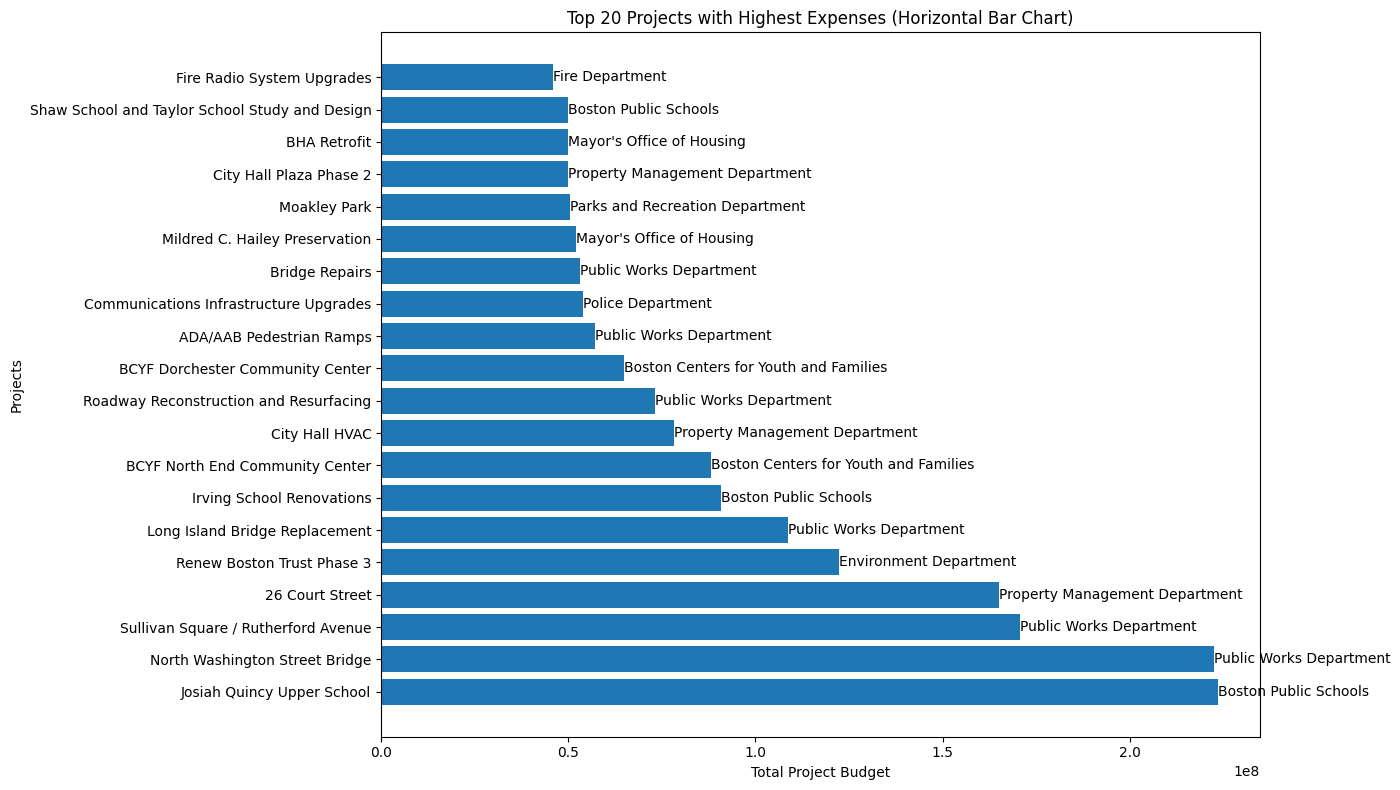

In [98]:
# Find the top 20 projects with the highest total project budget
top_20_projects = df.nlargest(20, 'Total_Project_Budget')

print("Top 20 projects with the highest total project budget:")
print(top_20_projects[['Project_Name', 'Total_Project_Budget', 'Department']])

# Create the horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(top_20_projects['Project_Name'], top_20_projects['Total_Project_Budget'])
plt.title('Top 20 Projects with Highest Expenses (Horizontal Bar Chart)')
plt.xlabel('Total Project Budget')
plt.ylabel('Projects')

# Annotate the bars with department names
for bar, department_name in zip(bars, top_20_projects['Department']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, department_name, ha='left', va='center')

plt.tight_layout()
plt.show()

Top 20 scopes of work with the highest total project budget:
                                                    Total_Project_Budget
Scope_Of_Work                                                           
Design and construct a new facility for the Jos...           223591467.0
Design and construction of a new bridge that wi...           222521987.0
Engineering and design services to provide for ...           170615403.0
Renovate building to improve envelope (roof, ne...           165000000.0
Identify energy retrofit project opportunities ...           143590173.0
Design and construct a new bridge from Moon Isl...           108758144.0
Design and construct a new branch library that ...           102390000.0
Upgrade building facilities at the Irving Schoo...            90770000.0
Develop a design for a new North End Community ...            88000000.0
Replace air handling units.                                   78220000.0
Includes road reconstruction, roadway resurfaci...            7

/var/folders/jf/5545lnxj347dw_q8nst81gpc0000gn/T/ipykernel_8974/142803454.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


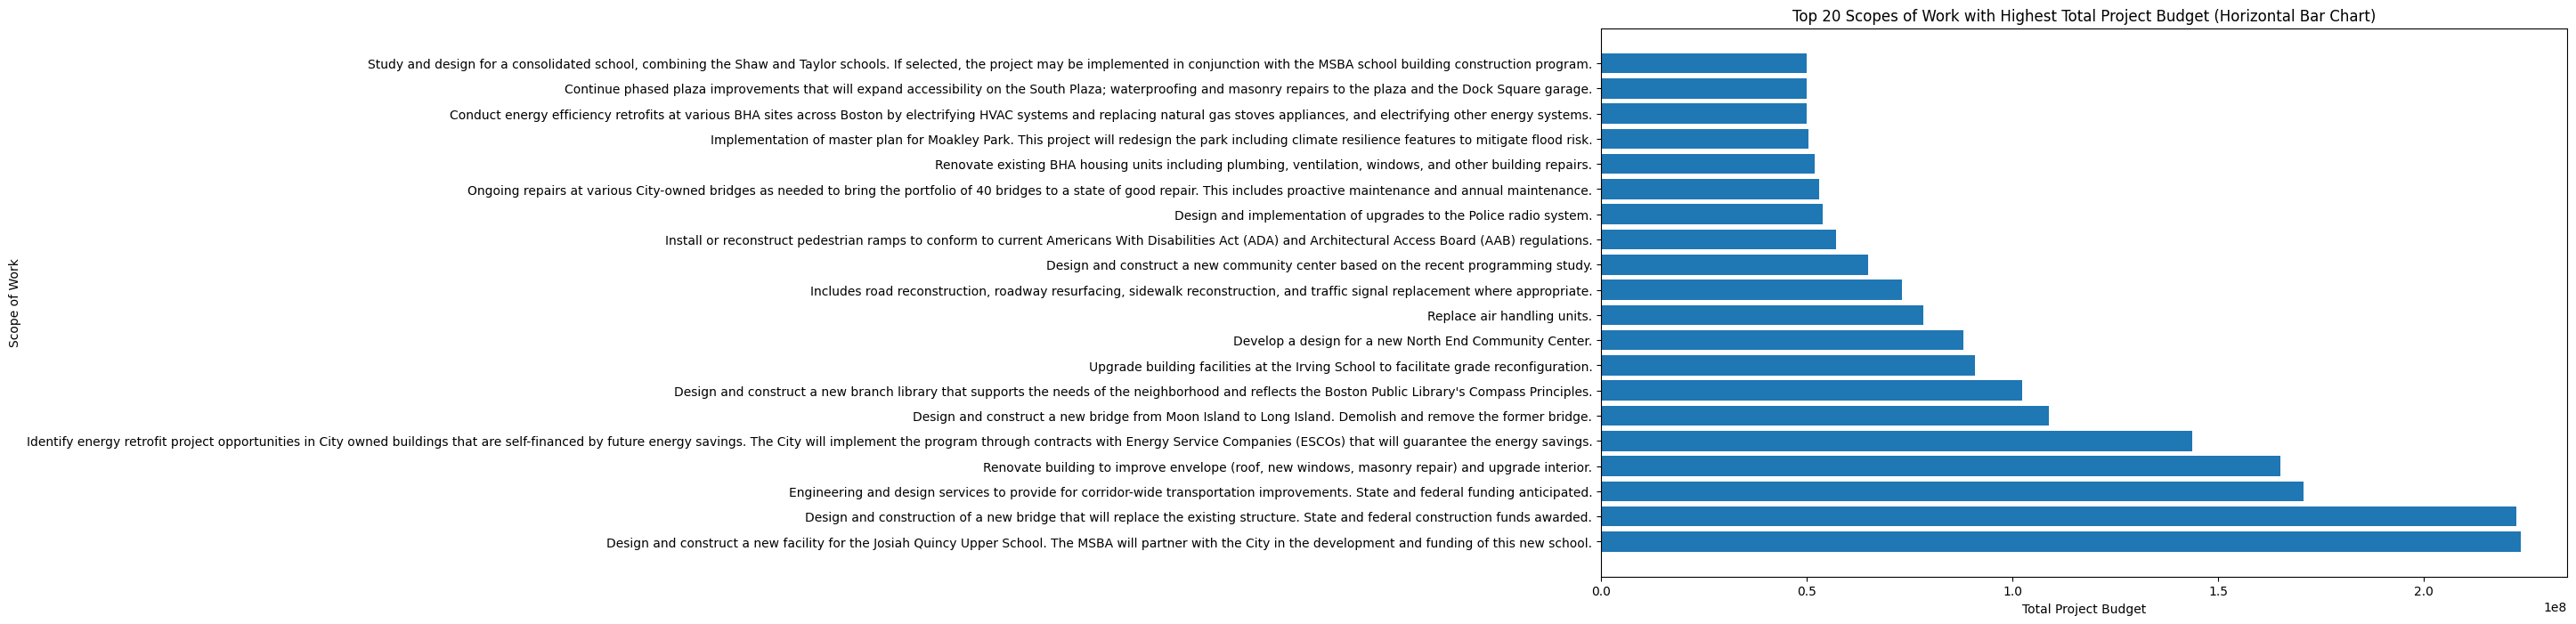

In [99]:
# Find the top 20 unique scopes of work with the highest total project budget
top_20_scopes_of_work = df.groupby('Scope_Of_Work').agg({
    'Total_Project_Budget': 'sum'
}).nlargest(20, 'Total_Project_Budget')

print("Top 20 scopes of work with the highest total project budget:")
print(top_20_scopes_of_work)

# Create the horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(top_20_scopes_of_work.index, top_20_scopes_of_work['Total_Project_Budget'])
plt.title('Top 20 Scopes of Work with Highest Total Project Budget (Horizontal Bar Chart)')
plt.xlabel('Total Project Budget')
plt.ylabel('Scope of Work')

plt.tight_layout()
plt.show()